In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import analyze_cells_energy as ace
import re
import utils
import itertools
import seaborn as sns
import utils_PLS as upls
import os

In [3]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

/home/user/.conda/envs/ClearMap/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [9]:
root_directory = '/data/szucca/'
experiment = 'Nicole'
experimental_group = 'Black_wf_WholeBrain'
batch = 'Black_wf_WholeBrain'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
            if os.path.isdir(os.path.join(data_directory, name))]
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_Black_wf_WholeBrain.npy', allow_pickle=True).item()

In [10]:
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, 
                                                      volumes=volumes)

# Format data for task PLS

In [11]:
data_ncells = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='n_cells')
data_energy = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='energy')
data_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                    batch=batch, table='density')
data_relative_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                             batch=batch, table='relative_density')
data_ncells.dropna(inplace=True, axis=1)
data_energy.dropna(inplace=True, axis=1)
data_density.dropna(inplace=True, axis=1)
data_relative_density.dropna(inplace=True, axis=1)
data_ncells.to_csv('./results_pls/'+batch+'_n_cells.csv')
data_energy.to_csv('./results_pls/'+batch+'_energy.csv')
data_density.to_csv('./results_pls/'+batch+'_density.csv')
data_relative_density.to_csv('./results_pls/'+batch+'_relative_density.csv')

# Format data for hierarchy plotting

In [12]:
df_levels = upls.create_df_levels(volumes)

# Apply task PLS for all areas and energy

In [16]:
%%bash
python area_pls.py -i results_pls/Black_wf_WholeBrain_n_cells.csv -o './results_pls/Black_wf_WholeBrain_ncells'

In [17]:
%%bash
python area_pls.py -i results_pls/Black_wf_WholeBrain_energy.csv -o './results_pls/Black_wf_WholeBrain_energy'

In [18]:
%%bash
python area_pls.py -i results_pls/Black_wf_WholeBrain_density.csv -o './results_pls/Black_wf_WholeBrain_density'

In [19]:
%%bash
python area_pls.py -i results_pls/Black_wf_WholeBrain_relative_density.csv -o './results_pls/Black_wf_WholeBrain_relative_density'

# Plot results

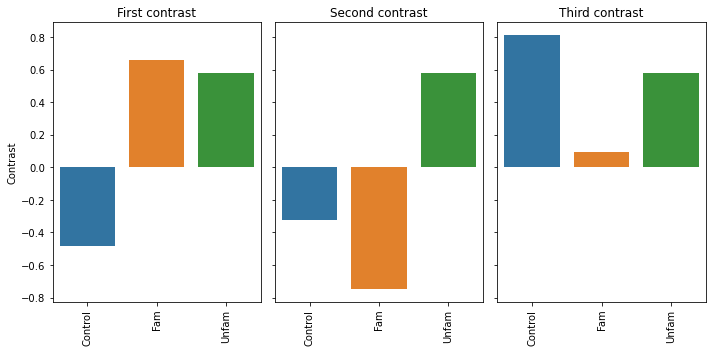

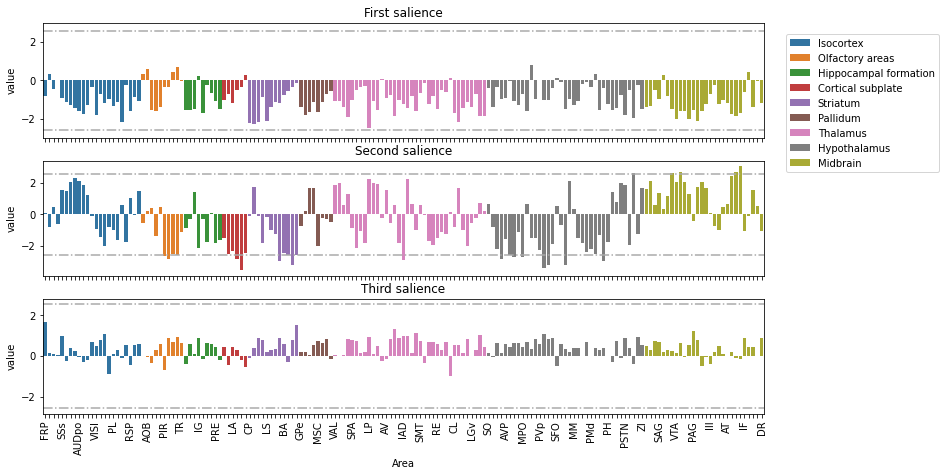

In [20]:
upls.plot_panel_contrasts(batch=batch, variable='ncells')
upls.plot_panel_saliences(batch=batch, variable='ncells', df_levels=df_levels)

# PLS ENERGY

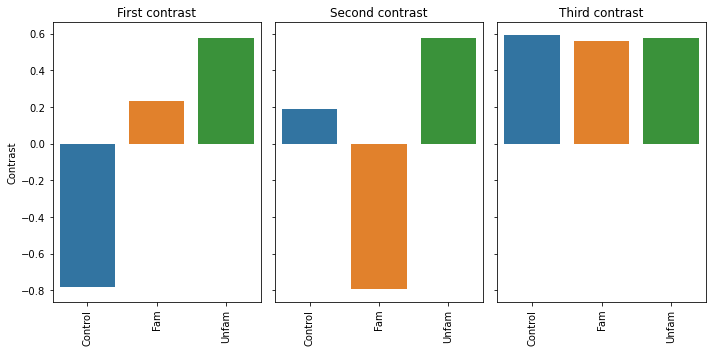

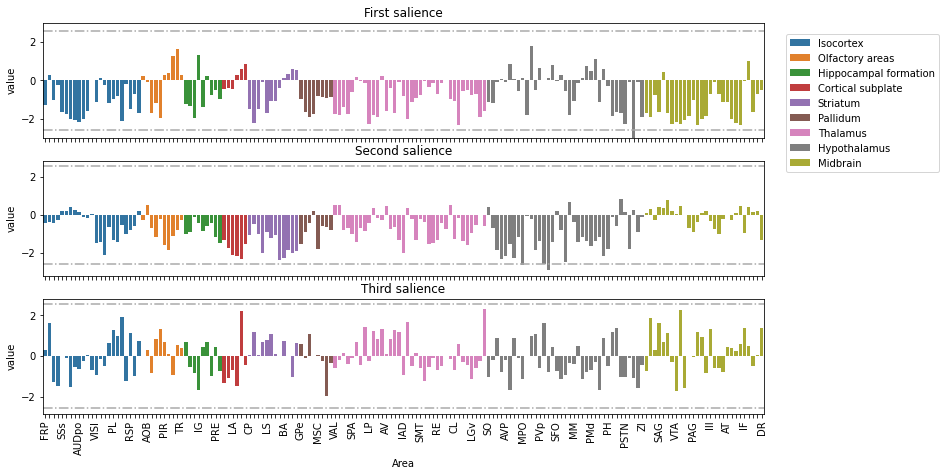

In [21]:
upls.plot_panel_contrasts(batch=batch, variable='energy')
upls.plot_panel_saliences(batch=batch, variable='energy', df_levels=df_levels)

# PLS density

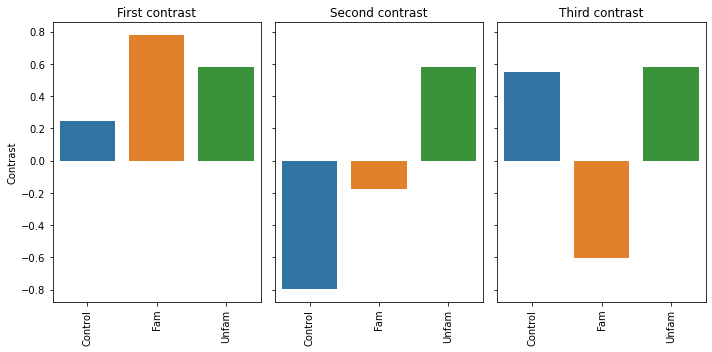

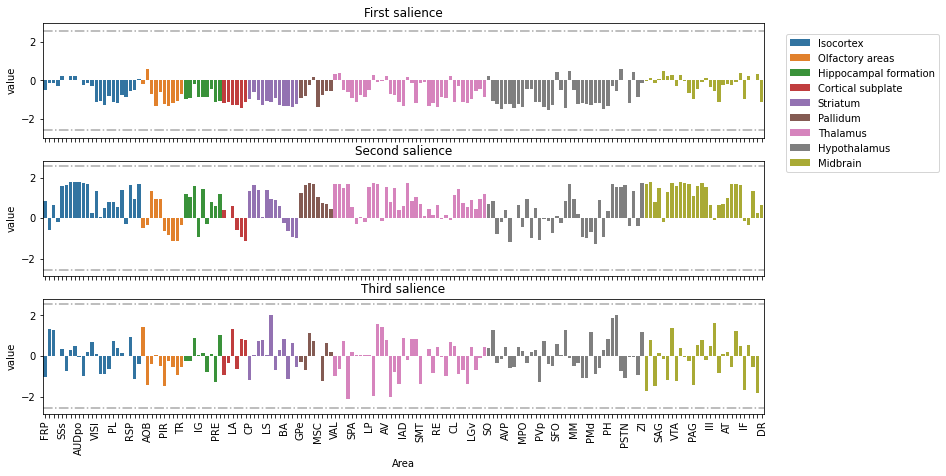

In [22]:
upls.plot_panel_contrasts(batch=batch, variable='density')
upls.plot_panel_saliences(batch=batch, variable='density', df_levels=df_levels)

# PLS relative density

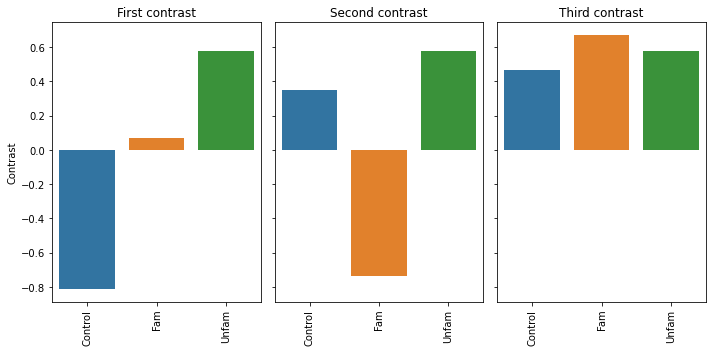

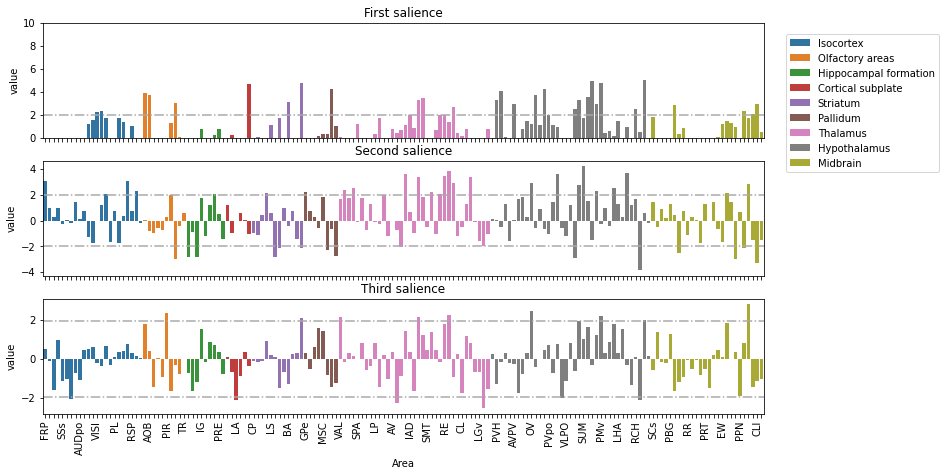

In [21]:
upls.plot_panel_contrasts(batch=batch, variable='relative_density')
upls.plot_panel_saliences(batch=batch, variable='relative_density', df_levels=df_levels)

# Identify area overlap

In [29]:
overlap = {'ncells':[], 'energy':[], 'density':[], 'relative_density':[]}
for variable in overlap.keys():
    overlap[variable] = set(upls.identify_pls_sig_areas(saliences=pd.read_csv(
        './results_pls/'+ batch +'_'+ variable +'_saliences.csv'), 
                                           threshold=1.96, #1.96 --> 95%; 2.57 --> 99%
                                           volumes=volumes))
[len(overlap[key]) for key in overlap.keys()]

[61, 40, 5, 63]

In [30]:
# union between areas significant in all analyses
all_areas = overlap['ncells'].union(overlap['energy']).union(overlap['density']).union(overlap['relative_density'])
# intersection between areas significant in all analyses
intersection = overlap['ncells'].intersection(overlap['energy']).intersection(
    overlap['density']).intersection(overlap['relative_density'])
# filtering
intersection

set()

In [31]:
overlap['ncells']


{'Anterior amygdalar area',
 'Anterior hypothalamic nucleus',
 'Anterodorsal preoptic nucleus',
 'Anteroventral periventricular nucleus',
 'Arcuate hypothalamic nucleus',
 'Basolateral amygdalar nucleus',
 'Basomedial amygdalar nucleus',
 'Bed nucleus of the accessory olfactory tract',
 'Caudoputamen',
 'Central amygdalar nucleus',
 'Cortical amygdalar area',
 'Cuneiform nucleus',
 'Dorsal auditory area',
 'Dorsal premammillary nucleus',
 'Dorsomedial nucleus of the hypothalamus',
 'Endopiriform nucleus',
 'Fundus of striatum',
 'Induseum griseum',
 'Inferior colliculus',
 'Interanterodorsal nucleus of the thalamus',
 'Intercalated amygdalar nucleus',
 'Intergeniculate leaflet of the lateral geniculate complex',
 'Lateral amygdalar nucleus',
 'Lateral dorsal nucleus of thalamus',
 'Lateral mammillary nucleus',
 'Lateral posterior nucleus of the thalamus',
 'Lateral septal nucleus',
 'Lateral terminal nucleus of the accessory optic tract',
 'Medial amygdalar nucleus',
 'Medial preoptic 

In [32]:
overlap['relative_density']

{'Agranular insular area',
 'Anterior amygdalar area',
 'Anterior hypothalamic nucleus',
 'Anterodorsal preoptic nucleus',
 'Anteroventral periventricular nucleus',
 'Basomedial amygdalar nucleus',
 'Bed nucleus of the accessory olfactory tract',
 'Central amygdalar nucleus',
 'Central lateral nucleus of the thalamus',
 'Cortical amygdalar area',
 'Dorsal nucleus raphe',
 'Dorsomedial nucleus of the hypothalamus',
 'Endopiriform nucleus',
 'Fundus of striatum',
 'Globus pallidus internal segment',
 'Inferior colliculus',
 'Interanterodorsal nucleus of the thalamus',
 'Intercalated amygdalar nucleus',
 'Interpeduncular nucleus',
 'Lateral posterior nucleus of the thalamus',
 'Lateral septal nucleus',
 'Lateral terminal nucleus of the accessory optic tract',
 'Medial amygdalar nucleus',
 'Medial habenula',
 'Medial mammillary nucleus',
 'Medial preoptic area',
 'Medial preoptic nucleus',
 'Medial septal complex',
 'Median preoptic nucleus',
 'Mediodorsal nucleus of thalamus',
 'Midbrain 